
```
This assignment involves implementing a neural network with a single linear layer followed by softmax, for a 3-class classification problem. You are allowed to use any functionality from scipy and numpy, but no other library should be used in the implementation. You can use matplotlib or other plotting library for the plots. 

Given is the following dataset (same as previous PSS), where each row is a sample represented by a 4-pixel image and the measured output is the last column.

$D_{train}$ = [[255, 128, 128, 0, 0], [55, 128, 128, 128, 1], [192, 128, 128, 0, 0],

[100, 128, 128, 100, 1], [30, 64, 128, 30, 2], [20, 64, 128, 0, 2]]


Consider a neural network (NN) composed of 3 linear activations (a single fully-connected layer), followed by softmax, parameterized by weights W with shape 4x3 and biases B with shape 1x3, initialized with the values 0.

We will use cross-entropy loss and gradient descent. Refer to the lectures notes or the current Pen+Paper assignment for the parameter update equations.

Submit using mycourses dropbox. Save the file in ipynb format.
Your submission will be shared with all your classmates.

You are allowed to research code online or use LLM code generators.
```

# 0. Initialization

Let's first create some numpy arrays which correspond to weight and bias matrices.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

W = np.zeros((4, 3))
b = np.zeros((1, 3))

# 1. Feature data & ground truth arrays

Save the feature data and the ground truth in numpy arrays and show their shapes.

You need to create the feature array X incorporating the bias. Y will be your one-hot encoded ground-truth (target) numpy array.

In [2]:
MAX_VALUE = 255
samples = [[255, 128, 128, 0, 0], [55, 128, 128, 128, 1], [192, 128, 128, 0, 0],
[100, 128, 128, 100, 1], [30, 64, 128, 30, 2], [20, 64, 128, 0, 2]]

# divide by max value and get normalized values
images = [[s / MAX_VALUE for s in sample[:-1]] for sample in samples]

X = []
for image in images:
    lst = [1]
    lst.extend(image)
    X.append(lst)

X = np.array(X)

Y_labels = np.array([sample[-1] for sample in samples])
num_classes = np.max(Y_labels) + 1 # 3

# one hot encoding
Y = np.eye(num_classes)[Y_labels]

print(f"Shape of X: {X.shape}")
print(f"Shape of Y: {Y.shape}")

Shape of X: (6, 5)
Shape of Y: (6, 3)


# 2. Plot the images in grayscale
(2x2 pixels each image)

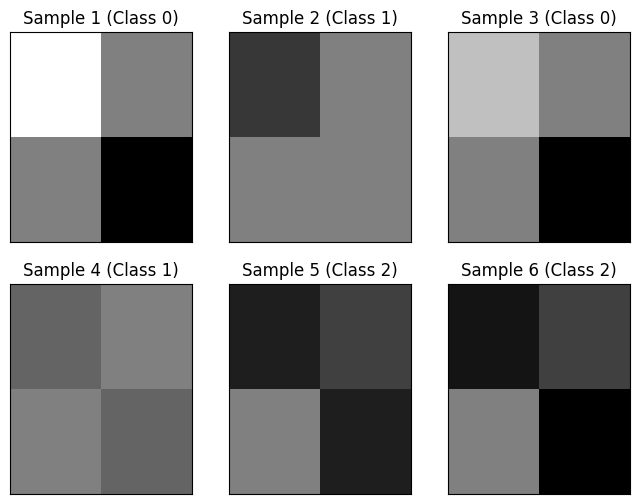

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
axes = axes.ravel()

for i, (image, label) in enumerate(zip(images, Y_labels)):
    reshaped_img = np.array(image).reshape(2, -1)
    axes[i].imshow(reshaped_img, cmap='gray', vmin=0, vmax=1, aspect='auto')

    axes[i].set_title(f"Sample {i + 1} (Class {label})")

    axes[i].set_xticks([])
    axes[i].set_yticks([])

# 3. Forward pass
Using loops, implement the neural network forward pass.

We will want to calculate the output logits `Z`.

In [4]:
# get image arrays as numpy arrays
images = [np.array(image) for image in images]

def forward_pass(images):
    # output logits - 3 total layers
    Z = []
    total_classes = W.shape[1]

    for image in images:
        Z_sample = []

        for j in range(total_classes):
            x_dot_w_j = sum([W[i, j] * image[i] for i in range(len(image))])
            # x_dot_w_j = W[:, j].T @ image

            l_j = b[:, j] + x_dot_w_j

            Z_sample.append(l_j[0])
        Z.append(Z_sample)

    return Z

test_forward_pass = forward_pass(images)
test_forward_pass

[[np.float64(0.0), np.float64(0.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(0.0)]]

# 4. Backward pass
Using loops, implement the neural network backward pass.

We can calculate the error here and use the given equations to implement the backward pass.

In [5]:
def backward_pass(images, mat_logits, Y_labels, W, b, lr=0.1):
    N_samples = len(images)
    total_features = W.shape[0]
    total_classes = W.shape[1]

    # calculate weight update
    delta_w_loops = np.zeros((total_features, total_classes))
    delta_b_loops = np.zeros((1, total_classes))
    
    for s in range(N_samples):
        image = images[s]
        logits = mat_logits[s]
        y_label = Y_labels[s]

        # apply softmax
        p_j = sp.special.softmax(logits)

        # make one-hot vector, find error
        y = np.eye(total_classes)[y_label]
        err = p_j - y

        for i in range(total_features):
            for j in range(total_classes):
                delta_w_loops[i, j] += image[i] * err[j]

        # image = image.reshape((1, -1))
        # err = err.reshape((1, -1))
        # delta_w = lr * (image.T @ err)

        # calculate bias update
        delta_b_loops[0, :] += err[:]

    delta_w_avg = lr * (delta_w_loops / N_samples)
    delta_b_avg = lr * (delta_b_loops / N_samples)

    # update weight and bias
    W_updated = W - delta_w_avg
    b_updated = b - delta_b_avg
        
    return W_updated, b_updated

test_backward_pass = backward_pass(images, test_forward_pass, Y_labels, W, b)
test_backward_pass

(array([[ 1.50108932e-02, -4.07407407e-03, -1.09368192e-02],
        [ 2.78867102e-03,  2.78867102e-03, -5.57734205e-03],
        [ 2.77555756e-18,  1.85037171e-18,  1.85037171e-18],
        [-5.62091503e-03,  9.28104575e-03, -3.66013072e-03]]),
 array([[5.55111512e-18, 3.70074342e-18, 3.70074342e-18]]))

# 5. Forward pass (vector form)
Using the vector-form (using no loops in the code), implement the neural network forward pass.

In [6]:
def forward_pass_vector(X, W, b):
    # augment W
    W_augmented = np.vstack([b, W])

    # output logits - 3 total layers
    Z = X @ W_augmented

    return Z

test_forward_pass = forward_pass_vector(X, W, b)
test_forward_pass

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

# 6. Backward pass (vector-form) 
Using the vector-form (using no loops in the code), implement the neural network backward pass.

In [7]:
def backward_pass_vector(images, mat_logits, Y_labels, W, b, lr=0.1):
    # get params
    N_samples = len(images)
    total_classes = W.shape[1]

    # apply softmax row-wise
    S = sp.special.softmax(mat_logits, axis=1)

    # get one-hot encoded matrix
    Y = np.eye(total_classes)[Y_labels]

    # get error
    E = S - Y

    # weight and bias updates (averaged)
    delta_W = lr * ((np.array(images).T @ E) / N_samples)
    delta_b = lr * (np.mean(E, axis=0, keepdims=True))

    W_updated = W - delta_W
    b_updated = b - delta_b

    return W_updated, b_updated

test_backward_pass = backward_pass_vector(images, test_forward_pass, Y_labels, W, b)
test_backward_pass

(array([[ 1.50108932e-02, -4.07407407e-03, -1.09368192e-02],
        [ 2.78867102e-03,  2.78867102e-03, -5.57734205e-03],
        [ 2.77616226e-18,  1.85097640e-18,  1.85279049e-18],
        [-5.62091503e-03,  9.28104575e-03, -3.66013072e-03]]),
 array([[5.55111512e-18, 3.70074342e-18, 3.70074342e-18]]))

# 7. 10-epoch training with error
Train this model for 10 epochs (1 averaged update for 1 full pass on the dataset), using the learning rate of 0.3. Repeat for learning # rate of 0.5. Write down the new accuracy after each update.

Now print the error for each update (same training process, don't resume/repeat the training)

In [8]:
learning_rates = [0.3, 0.5]
EPOCHS = 10

def run_epoch_vector(images, Y_labels, X, W, b, lr):
    logits = forward_pass_vector(X, W, b)
    updates = backward_pass_vector(images, logits, Y_labels, W, b, lr)

    return updates
    
results = {}

def run_training_vector(X, W, b, Y_labels, epochs=10, lr=0.1):
    W_training = W[:]
    b_training = b[:]

    init_loss, init_acc = epoch_stats(X, W, b, Y_labels)

    losses = [init_loss]
    accuracies = [init_acc]

    for epoch in range(epochs):
        print(f"Running epoch {epoch + 1} with learning rate {lr}...", end="")
        W_updated, b_updated = run_epoch_vector(images, Y_labels, X, W_training, b_training, lr)
        W_training = W_updated
        b_training = b_updated

        loss, acc = epoch_stats(X, W_training, b_training, Y_labels)
        losses.append(loss)
        accuracies.append(acc)
        print(f"Loss: {loss}, Accuracy: {acc:.2%}\n")

    print(f"Final stats for training {epoch + 1} epochs with learning rate {lr}:\nLoss: {loss:.4f}\nAccuracy: {acc:.2%}")

    return losses, accuracies

def epoch_stats(X, W, b, Y_labels):
    logits = forward_pass_vector(X, W, b)

    # apply softmax row-wise
    S = sp.special.softmax(logits, axis=1)

    # get one-hot encoded matrix
    Y = np.eye(W.shape[1])[Y_labels]

    # loss calculation
    epsilon = 1e-12
    S_clipped = np.clip(S, epsilon, 1. - epsilon)

    L_sample = Y * np.log(S_clipped)
    cross_entropy = -np.mean(np.sum(L_sample, axis=1))

    # accuracy calculation
    predictions = np.argmax(S, axis=1)
    correct = (predictions == Y_labels)

    print(f" Predictions: {predictions}, Actual: {Y_labels}")

    accuracy = np.mean(correct)

    return cross_entropy, accuracy

for lr in learning_rates:
    print(f"Running trial with learning rate {lr}:\n-=-=-=-=-=-=-=-=-\n")
    ls, accs = run_training_vector(X, W, b, Y_labels, epochs=EPOCHS, lr=lr)

    results[lr] = {'loss_history': ls, 'acc_history': accs}

    print("\n")

Running trial with learning rate 0.3:
-=-=-=-=-=-=-=-=-

 Predictions: [0 0 0 0 0 0], Actual: [0 1 0 1 2 2]
Running epoch 1 with learning rate 0.3... Predictions: [0 1 0 0 0 0], Actual: [0 1 0 1 2 2]
Loss: 1.0826738467780668, Accuracy: 50.00%

Running epoch 2 with learning rate 0.3... Predictions: [0 1 0 0 0 0], Actual: [0 1 0 1 2 2]
Loss: 1.0675891070857306, Accuracy: 50.00%

Running epoch 3 with learning rate 0.3... Predictions: [0 1 0 0 1 0], Actual: [0 1 0 1 2 2]
Loss: 1.0531777617397116, Accuracy: 50.00%

Running epoch 4 with learning rate 0.3... Predictions: [0 1 0 0 1 0], Actual: [0 1 0 1 2 2]
Loss: 1.0393127942216964, Accuracy: 50.00%

Running epoch 5 with learning rate 0.3... Predictions: [0 1 0 1 1 0], Actual: [0 1 0 1 2 2]
Loss: 1.025904140914248, Accuracy: 66.67%

Running epoch 6 with learning rate 0.3... Predictions: [0 1 0 1 1 1], Actual: [0 1 0 1 2 2]
Loss: 1.0128874065385454, Accuracy: 66.67%

Running epoch 7 with learning rate 0.3... Predictions: [0 1 0 1 1 2], Actual:

# 9. Plotted error by epoch
Plot the error (loss output) over the 10 epochs, for both learning rates. You need to present 2 error plots (one for each learning rate).

# 10. Plotted accuracy by epoch

Plot the accuracy over the 10 epochs, for both learning rates. You need to present 2 accuracy plots (one for each learning rate).

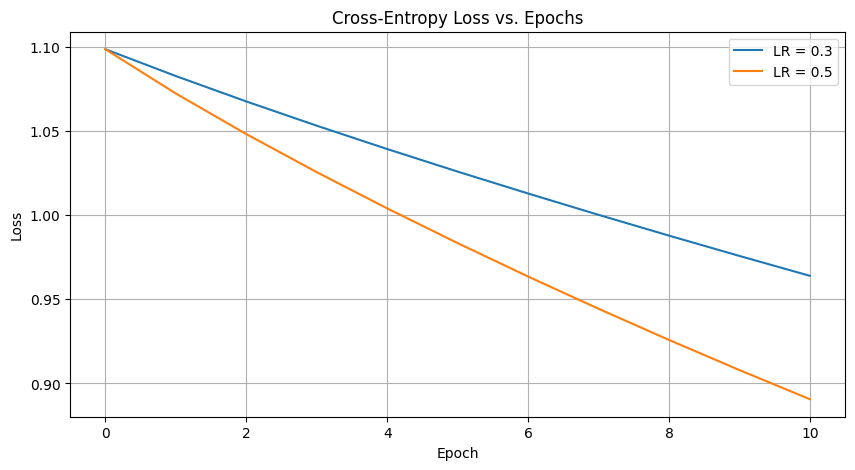

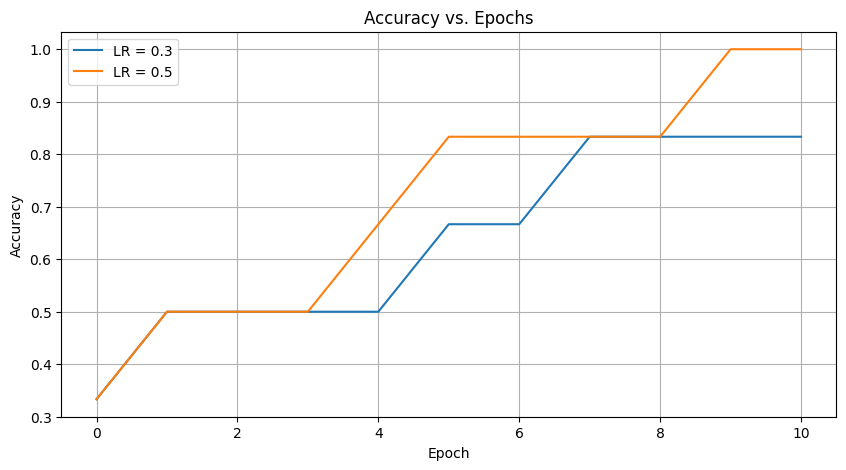

In [9]:
def plot_training_results(training_results, epochs):
    epochs_range = range(epochs + 1)
    
    # plot loss plots
    plt.figure(figsize=(10, 5))
    plt.title("Cross-Entropy Loss vs. Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    
    for lr, data in training_results.items():
        plt.plot(epochs_range, data['loss_history'], label=f'LR = {lr}')
        
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # plot accuracy plots
    plt.figure(figsize=(10, 5))
    plt.title("Accuracy vs. Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    
    for lr, data in training_results.items():
        plt.plot(epochs_range, data['acc_history'], label=f'LR = {lr}')
        
    plt.legend()
    plt.grid(True)
    plt.show()

plot_training_results(results, EPOCHS)